In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import thi

In [2]:
data = pd.read_csv("dataset/preprocessed.csv")
data.shape


(762106, 44)

In [3]:
data = data.drop(data[data.target == -1].index)
data.shape


(762094, 44)

In [4]:
# Separate input features and target
targets = data.target
targets.head()

0    3
1    5
2    2
3    2
4    1
Name: target, dtype: int64

In [5]:
targets -= 1
targets.head()


0    2
1    4
2    1
3    1
4    0
Name: target, dtype: int64

In [6]:
targets = targets.to_numpy()


In [7]:
features = data.drop('target', axis=1)


In [8]:
features = features.to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

In [10]:
X_train.shape

(609675, 43)

In [11]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [ 62846  69846 109216 147032 220735]]


In [12]:
sm = SMOTETomek(random_state = 27, n_jobs = -1)

X_train, y_train = sm.fit_sample(X_train, y_train)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=Futur

In [13]:
X_train.shape

(955513, 43)

In [14]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [204152 195863 187569 181912 186017]]


In [15]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn import linear_model
logisticRegr = linear_model.SGDClassifier(loss= 'log' ,max_iter=1000, tol=1e-3, n_iter_no_change = 5, shuffle = True, n_jobs = -1, learning_rate = 'optimal', early_stopping = True, validation_fraction = 0.1, class_weight = 'balanced')

In [17]:
import datetime
a = datetime.datetime.now().replace(microsecond=0)
logisticRegr.fit(X_train, y_train)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:06


In [18]:
a = datetime.datetime.now().replace(microsecond=0)
predictions = logisticRegr.predict(X_test)
b = datetime.datetime.now().replace(microsecond=0)
print(b-a)

0:00:00


In [19]:
# Use score method to get accuracy of model
a = datetime.datetime.now().replace(microsecond=0)

score = logisticRegr.score(X_test, y_test)
print(score)
b = datetime.datetime.now().replace(microsecond=0)
print("time ",b-a)

0.37930966611774125
time  0:00:00


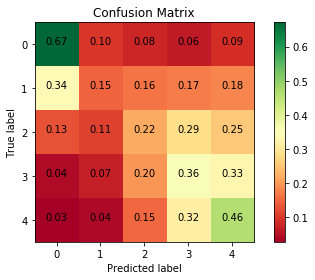

array([[0.6711754 , 0.09781452, 0.07777569, 0.06331016, 0.08992423],
       [0.3376601 , 0.14565505, 0.16409167, 0.17109873, 0.18149446],
       [0.13005589, 0.11167083, 0.21881894, 0.28551993, 0.2539344 ],
       [0.044931  , 0.06989569, 0.19697381, 0.35800826, 0.33019124],
       [0.02736639, 0.04161291, 0.15198706, 0.31693046, 0.46210318]])

In [20]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest',cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(5):
    for j in range(5):
        plt.text(j,i,format(cm[i][j],".2f"),horizontalalignment="center",color="black")
plt.tight_layout()
plt.show()
cm

